In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('ticks')

In [3]:
df = pd.read_csv('CAGEDMOV202005.csv',encoding = 'utf-8', delimiter=";", low_memory=False)

In [4]:
#caso o data frame seja lido em iso-8859-1
'''
df = df.rename(columns = {'competÃªncia': 'competência', 
'regiÃ£o': 'região',
'municÃ­pio': 'município',
'seÃ§Ã£o': 'seção',
'saldomovimentaÃ§Ã£o': 'saldomovimentação',
'cbo2002ocupaÃ§Ã£o' : 'cbo2002ocupação',
'graudeinstruÃ§Ã£o': 'graudeinstrução',
'raÃ§acor': 'raçacor',
'tipomovimentaÃ§Ã£o': 'tipomovimentação',
'tipodedeficiÃªncia': 'tipodedeficiência',
'salÃ¡rio': 'salário'}, inplace = False)
'''

"\ndf = df.rename(columns = {'competÃªncia': 'competência', \n'regiÃ£o': 'região',\n'municÃ\xadpio': 'município',\n'seÃ§Ã£o': 'seção',\n'saldomovimentaÃ§Ã£o': 'saldomovimentação',\n'cbo2002ocupaÃ§Ã£o' : 'cbo2002ocupação',\n'graudeinstruÃ§Ã£o': 'graudeinstrução',\n'raÃ§acor': 'raçacor',\n'tipomovimentaÃ§Ã£o': 'tipomovimentação',\n'tipodedeficiÃªncia': 'tipodedeficiência',\n'salÃ¡rio': 'salário'}, inplace = False)\n"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884187 entries, 0 to 1884186
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   competência          int64  
 1   região               int64  
 2   uf                   int64  
 3   município            int64  
 4   seção                object 
 5   subclasse            int64  
 6   saldomovimentação    int64  
 7   cbo2002ocupação      int64  
 8   categoria            int64  
 9   graudeinstrução      int64  
 10  idade                float64
 11  horascontratuais     int64  
 12  raçacor              int64  
 13  sexo                 int64  
 14  tipoempregador       int64  
 15  tipoestabelecimento  int64  
 16  tipomovimentação     int64  
 17  tipodedeficiência    int64  
 18  indtrabintermitente  int64  
 19  indtrabparcial       int64  
 20  salário              float64
 21  tamestabjan          int64  
 22  indicadoraprendiz    int64  
 23  fonte                int64  
dty

In [6]:
df['admitidos/desligados'] = df['tipomovimentação'].apply(lambda x: "Admitido" if x==10 or x==20 or x==25 or x==35 or x==70 else "Desligado")

In [7]:
Raca = {1: 'BRANCA',2: 'PRETA',3: 'PARDA', 4: 'AMARELA',5 : 'INDIGENA',6:'NÃO INFORMADA',  9: 'NAO IDENTIFICADO'}
Sexo = {1: 'MASCULINO',3 :'FEMININO', 9: 'NAO IDENTIFICADO'}
AdmDem = {1: 'ADMISSÃO', 2: 'DESLIGAMENTO'}
TipoMovDesagregado = {
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'}


In [8]:
df['raçacor'] = df['raçacor'].map(Raca)
df['sexo'] = df['sexo'].map(Sexo)
df['tipomovimentação'] = df['tipomovimentação'].map(TipoMovDesagregado)

In [9]:
df.groupby(by='sexo')['idade'].mean()

sexo
FEMININO     33.010774
MASCULINO    34.066102
Name: idade, dtype: float64

In [10]:
df.groupby(by='sexo')['salário'].mean()
df.groupby(by='sexo')['salário'].max()

sexo
FEMININO     39336220.0
MASCULINO    91960000.0
Name: salário, dtype: float64

In [11]:
df['salário'].max()

91960000.0

In [12]:
df['sexo'].value_counts()

MASCULINO    1192449
FEMININO      691738
Name: sexo, dtype: int64

<Figure size 720x360 with 0 Axes>

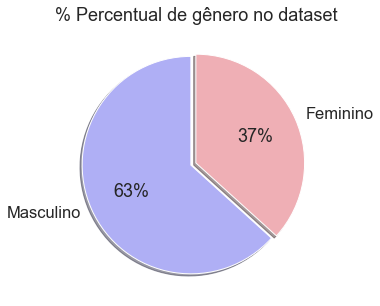

In [13]:
fig = plt.figure(figsize=(10, 5))
male_only = df[df['sexo'] == 'MASCULINO']
female_only = df[df['sexo'] == 'FEMININO']


fig = plt.figure(figsize=(5, 5))

colors = ['#AFAFF5', '#EFAFB5']
labels = ['Masculino', 'Feminino']
sizes = [len(male_only), len(female_only)]
explode = (0.05, 0)
sns.set(font_scale=1.5)
ax = plt.pie(sizes, labels=labels, explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.f%%')

plt.title('% Percentual de gênero no dataset')
plt.show()

In [14]:
df.groupby(by='raçacor')['salário'].mean()

raçacor
AMARELA             2563.968653
BRANCA              3994.366317
INDIGENA            2067.998688
NAO IDENTIFICADO    1587.257631
NÃO INFORMADA       2980.351736
PARDA               2473.577336
PRETA               2864.746006
Name: salário, dtype: float64

In [16]:
df['sexo'].value_counts()

MASCULINO    1192449
FEMININO      691738
Name: sexo, dtype: int64

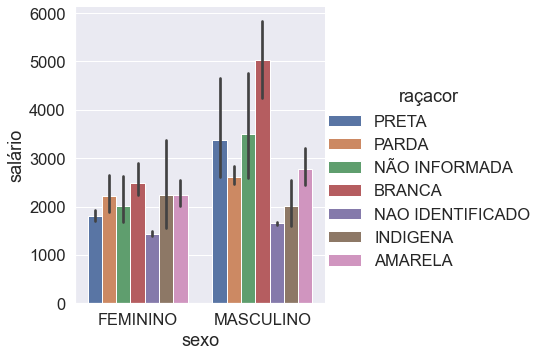

In [21]:
sns.catplot(x="sexo", y="salário", hue="raçacor", kind="bar", data=df)

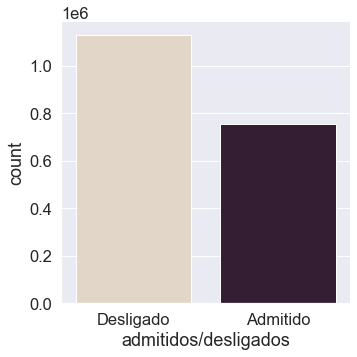

In [28]:
sns.catplot(x="admitidos/desligados", kind="count", palette="ch:.25", data=df)

In [15]:
df[df['admitidos/desligados'] == 'Desligado']['tipomovimentação'].value_counts()

Desligamento por Demissão sem Justa Causa        777579
Desligamento a Pedido                            154289
Término contrato trabalho prazo determinado      152333
Desligamento por Demissão com Justa Causa         12588
Desliamento por Acordo Empregado e Empregador     10743
Desligamento por Término de Contrato               8088
Desligamento por morte                             6432
Não Identificado                                   3567
Culpa Recíproca                                    1723
Desligamento por Aposentadoria                      621
Desligamento de Tipo Ignorado                        90
Name: tipomovimentação, dtype: int64

In [17]:
df['tipomovimentação'].value_counts()

Desligamento por Demissão sem Justa Causa           777579
Admissão por Reemprego                              709166
Desligamento a Pedido                               154289
Término contrato trabalho prazo determinado         152333
Admissão por Primeiro Emprego                        42574
Desligamento por Demissão com Justa Causa            12588
Desliamento por Acordo Empregado e Empregador        10743
Desligamento por Término de Contrato                  8088
Desligamento por morte                                6432
Não Identificado                                      3567
Admissão por contrato trabalho prazo determinado      2852
Culpa Recíproca                                       1723
Admissão por Reintegraçao                             1542
Desligamento por Aposentadoria                         621
Desligamento de Tipo Ignorado                           90
Name: tipomovimentação, dtype: int64

<AxesSubplot:xlabel='count', ylabel='tipomovimentação'>

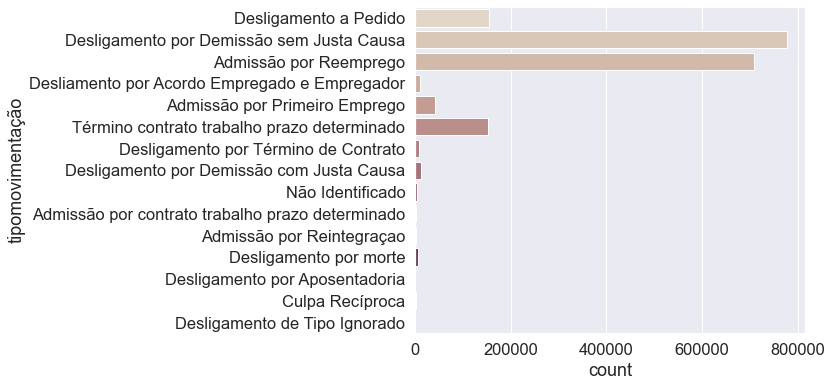

In [46]:
ax = plt.subplots(figsize=(7, 6))
sns.countplot(y="tipomovimentação", data=df, palette="ch:.25")

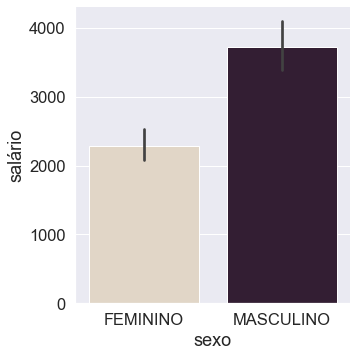

In [67]:
sns.catplot(x="sexo", y="salário",  palette="ch:.25",kind="bar", data=df)

In [19]:
df.groupby(by=['sexo','admitidos/desligados'])['salário'].mean()

sexo       admitidos/desligados
FEMININO   Admitido                2059.347277
           Desligado               2419.394337
MASCULINO  Admitido                2759.419168
           Desligado               4390.477669
Name: salário, dtype: float64

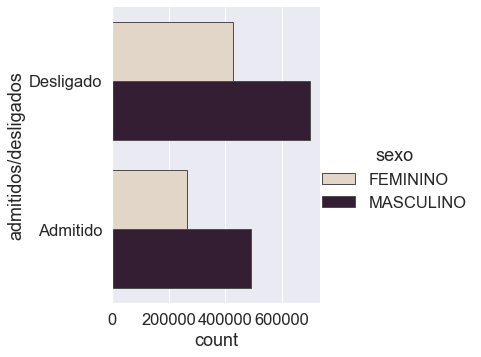

In [53]:
sns.catplot(y="admitidos/desligados", hue="sexo", kind="count",
            palette="ch:.25", edgecolor=".3",
            data=df)

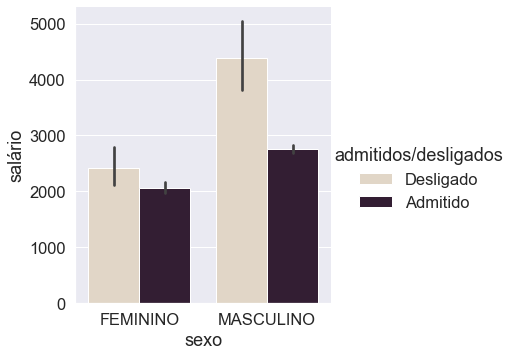

In [66]:
sns.catplot(x="sexo",palette="ch:.25", y="salário", hue="admitidos/desligados", kind="bar", data=df)